In [1]:
pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import pandas as pd

df_data = pd.read_csv("https://raw.githubusercontent.com/jonasdieckmann/prophet_tutorial/main/passengers.csv")

df_data_train = df_data[df_data["Month"] < "2023-01"]
df_data_test = df_data[df_data["Month"] >= "2023-01"]

display(df_data_train)

,Month,Passengers
0,2012-01,112
1,2012-02,118
2,2012-03,132
3,2012-04,129
4,2012-05,121
...,...,...
127,2022-08,559
128,2022-09,463
129,2022-10,407
130,2022-11,362


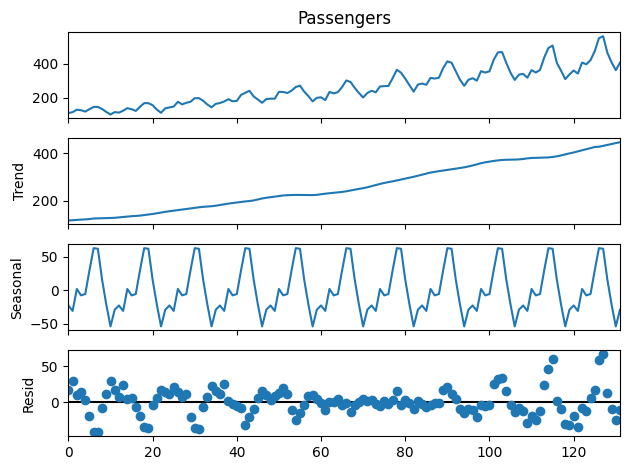

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_data_train.Passengers, model='additive', extrapolate_trend='freq', period=12)

decompose.plot().show()


In [5]:
# date variable needs to be named "ds" for prophet
df_train_prophet = df_data_train

df_train_prophet = df_train_prophet.rename(columns={"Month": "ds"})

# target variable needs to be named "y" for prophet
df_train_prophet = df_train_prophet.rename(columns={"Passengers": "y"})


In [6]:
model_prophet  = Prophet()
model_prophet.fit(df_train_prophet)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplf5plpol/ed6h68e6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplf5plpol/top9x2jy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25148', 'data', 'file=/tmp/tmplf5plpol/ed6h68e6.json', 'init=/tmp/tmplf5plpol/top9x2jy.json', 'output', 'file=/tmp/tmplf5plpol/prophet_modelh1ewjej2/prophet_model-20240127121808.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:18:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [7]:
df_future = model_prophet.make_future_dataframe(periods=12, freq='MS')
display(df_future)

,ds
0,2012-01-01
1,2012-02-01
2,2012-03-01
3,2012-04-01
4,2012-05-01
...,...
139,2023-08-01
140,2023-09-01
141,2023-10-01
142,2023-11-01


In [8]:
forecast_prophet = model_prophet.predict(df_future)
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].round().tail()

,ds,yhat,yhat_lower,yhat_upper
139,2023-08-01,532.0,507.0,555.0
140,2023-09-01,484.0,461.0,509.0
141,2023-10-01,446.0,421.0,471.0
142,2023-11-01,416.0,390.0,443.0
143,2023-12-01,449.0,423.0,473.0


<ipython-input-28-f2bae044d8e6>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])


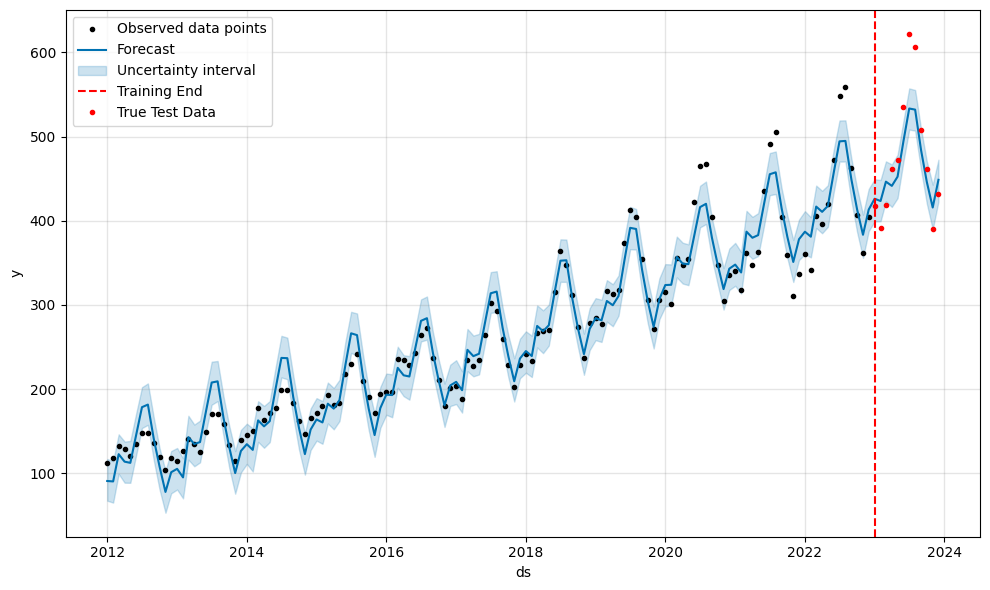

In [28]:
import matplotlib.pyplot as plt

# plot the time series
forecast_plot = model_prophet.plot(forecast_prophet)

# add a vertical line at the end of the training period
axes = forecast_plot.gca()
last_training_date = forecast_prophet['ds'].iloc[-12]
axes.axvline(x=last_training_date, color='red', linestyle='--', label='Training End')

# plot true test data for the period after the red line
df_data_test['Month'] = pd.to_datetime(df_data_test['Month'])
plt.plot(df_data_test['Month'], df_data_test['Passengers'],'ro', markersize=3, label='True Test Data')

# show the legend to distinguish between the lines
plt.legend()
